In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

(0.0, 500.0)

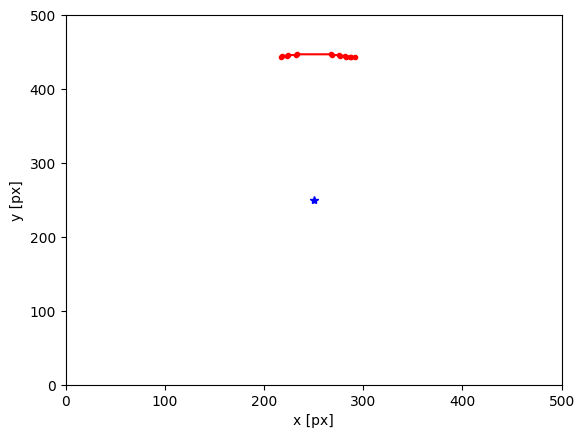

In [2]:
data = np.loadtxt("./window.txt", dtype='float', comments='#', delimiter=",")

x = data[:, 0]
y = data[:, 1]

plt.plot(x, y, 'ro-', markersize=3)
plt.plot(250, 250, 'b*')
plt.xlabel('x [px]')
plt.ylabel('y [px]')
plt.xlim([0,500])
plt.ylim([0,500])

(-250.0, 250.0)

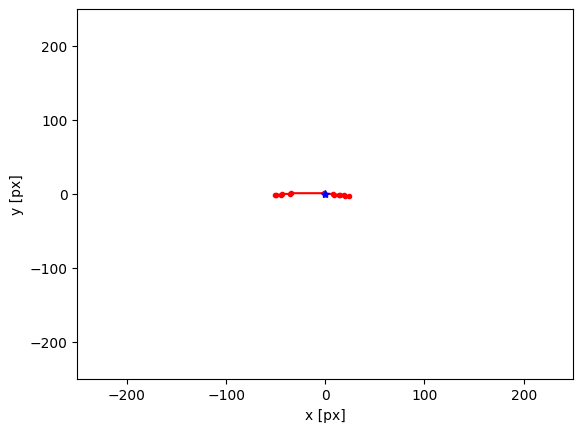

In [3]:
data = np.loadtxt("./translated.txt", dtype='float', comments='#', delimiter=",")

x = data[:, 0]
y = data[:, 1]

plt.plot(x, y, 'ro-', markersize=3)
plt.plot(0, 0, 'b*')
plt.xlabel('x [px]')
plt.ylabel('y [px]')
plt.xlim([-250,250])
plt.ylim([-250,250])

angle: 3.08432


(-250.0, 250.0)

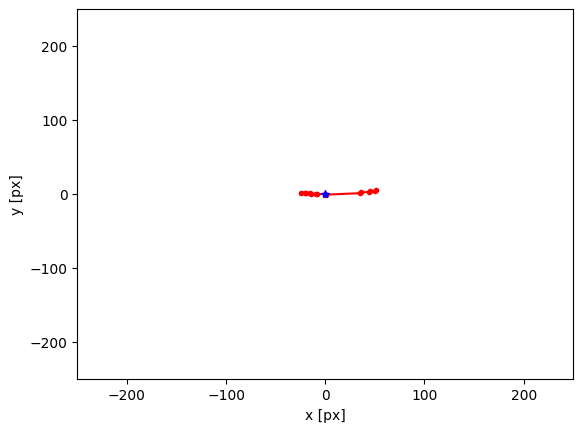

In [4]:
theta = np.loadtxt("./angle.txt")
print(f"angle: {theta}")  # example rotation angle
x_rot = x * np.cos(-theta) - y * np.sin(-theta)
y_rot = x * np.sin(-theta) + y * np.cos(-theta)

plt.plot(x_rot, y_rot, 'ro-', markersize=3)
plt.plot(0, 0, 'b*')#
plt.xlabel('x [px]')
plt.ylabel('y [px]')
plt.xlim([-250,250])
plt.ylim([-250,250]) 

(-250.0, 250.0)

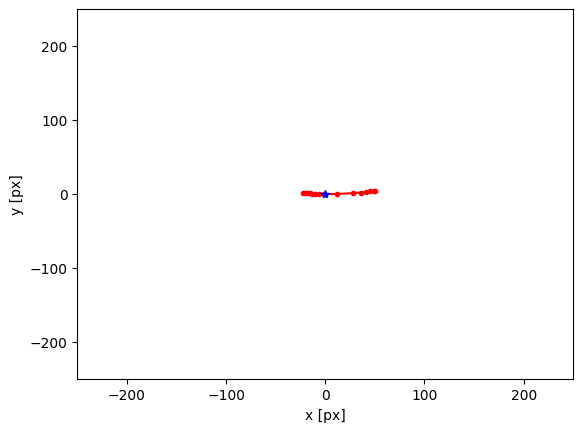

In [5]:
data = np.loadtxt("./rotated.txt", dtype='float', comments='#', delimiter=",")

x = data[:, 0]
y = data[:, 1]

plt.plot(x, y, 'ro-', markersize=3)
plt.plot(0, 0, 'b*')
plt.xlabel('x [px]')
plt.ylabel('y [px]')
plt.xlim([-250,250])
plt.ylim([-250,250])

In [6]:
def f(x, a, b, c):
    return c * x**2 + b * x + a

Fitted parameters: a=-0.2436601673859493, b=-0.03039297285261023, c=0.0024690304859819206
Curvature: 0.004938060971963841
Radius: 202.5086376368304


(-50.0, 50.0)

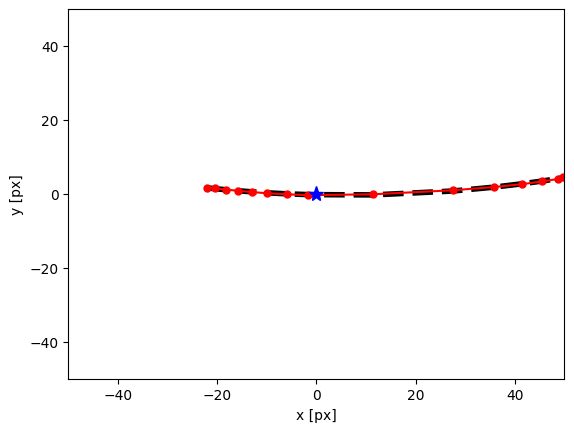

In [7]:
popt, _ = curve_fit(f, x, y)
fit_y = f(x, *popt)
print(f"Fitted parameters: a={popt[0]}, b={popt[1]}, c={popt[2]}")
print(f"Curvature: {2*popt[2]}")
print(f"Radius: {1/(2*popt[2])}")
plt.plot(x, fit_y, 'k--', linewidth=4)
plt.plot(x, y, 'ro-', markersize=5)
plt.plot(0, 0, 'b*', markersize=11)
plt.xlabel('x [px]')
plt.ylabel('y [px]')
plt.xlim([-50,50])
plt.ylim([-50,50])


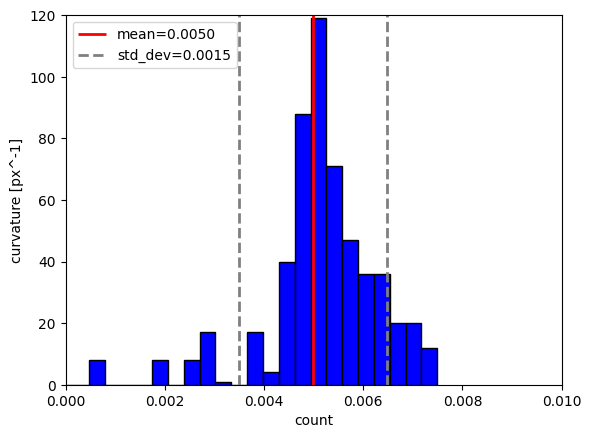

In [11]:
curvatures = np.loadtxt("./curvaturesDebug15.txt") #np.loadtxt("./profile15.txt")
mean    = np.mean(curvatures)
std_dev = np.std(curvatures)

plt.hist(curvatures, bins=25, color='blue', edgecolor='black')
plt.vlines(mean, ymin=0,   ymax=120, colors='r', linewidth=2, linestyles='solid', label=f'mean={mean:.4f}')
plt.vlines(mean + 1*std_dev, ymin=0, ymax=120, colors='gray', linewidth=2, linestyles='dashed', label=f'std_dev={std_dev:.4f}')
plt.vlines(mean - 1*std_dev, ymin=0, ymax=120, colors='gray', linewidth=2, linestyles='dashed')
plt.xlim([0.0, 0.01])
plt.ylim([0, 120])
plt.xlabel("count")
plt.ylabel("curvature [px^-1]")

plt.legend(loc='upper left')

In [12]:
indices = np.where(np.logical_and(curvatures >= mean - 1*std_dev, curvatures <= mean + 1*std_dev))
print(f"Num. of elems: {len(curvatures)}")
print(f"Num. in sigma: {len(curvatures[indices])}")
print(f"Percent: {len(curvatures[indices]) / len(curvatures) * 100} %")

print(f"Curvature mean: {mean}")
print(f"Curvature std. dev.: {std_dev}")
print(f"Radius mean: {1/mean}")

Num. of elems: 568
Num. in sigma: 442
Percent: 77.8169014084507 %
Curvature mean: 0.004986408172535211
Curvature std. dev.: 0.0014948481943687926
Radius mean: 200.54515502921126
